In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import math
from sklearn.model_selection import train_test_split

%matplotlib inline

Нека си заредим train сета, и директно да разделим колоните на числови и категорийни.

Нека след това запълним празните места по подходящ начин.

In [2]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
numeric_column_names = train.describe().columns.drop(labels=["SalePrice"])
categorical_column_names = train.dtypes[train.dtypes == 'object'].index

Да погледнем числовите данни за празни entry-та

In [3]:
print(train[numeric_column_names].isnull().sum().sort_values(ascending = False))

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
YrSold             0
BsmtFinSF2         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF1         0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
GrLivArea          0
BsmtHalfBath       0
MoSold             0
WoodDeckSF         0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
GarageArea         0
FullBath           0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
MSSubClass         0
dtype: int64


Whoops - имаме 3 числови колони с липсващи стойности. Ще пробваме 2 неща:

1) запълваме ги с нули

2) запълваме ги със средната стойност за колоната

И след това ще сравним резултатите, които получаваме

In [4]:
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [5]:
train_0s = train.copy()
train_0s[numeric_column_names] = train_0s[numeric_column_names].fillna(0)

train_no_sale_price = train_0s.drop(labels=['SalePrice'], axis=1)
train_sale_price = train_0s['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=42)

regressor_numeric_0s = LinearRegression()
regressor_numeric_0s.fit(x_train[numeric_column_names], y_train)

print("train score: ", regressor_numeric_0s.score(x_train[numeric_column_names], y_train))
print("test score: ", regressor_numeric_0s.score(x_test[numeric_column_names], y_test))



train score:  0.8036059693980434
test score:  0.8281875380027397


Не е зле.. да видим със средна стойност

In [6]:
train_mean = train.copy()
train_mean['LotFrontage'] = train_mean['LotFrontage'].fillna(train_mean['LotFrontage'].mean())
train_mean['GarageYrBlt'] = train_mean['GarageYrBlt'].fillna(train_mean['GarageYrBlt'].mean())
train_mean['MasVnrArea'] = train_mean['MasVnrArea'].fillna(train_mean['MasVnrArea'].mean())

train_no_sale_price = train_mean.drop(labels=['SalePrice'], axis=1)
train_sale_price = train_mean['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=42)

regressor_numeric_mean = LinearRegression()
regressor_numeric_mean.fit(x_train[numeric_column_names], y_train)

print("train score: ", regressor_numeric_mean.score(x_train[numeric_column_names], y_train))
print("test score: ", regressor_numeric_mean.score(x_test[numeric_column_names], y_test))

train score:  0.8013567186841833
test score:  0.8219254533698767


Учудващо, така е малко по-зле.. good to know, in any case

NOTE: След известно тестване, открих че най-добър резултат се получава, когато само GarageYrBlt e запълнен с 0, а другите със средна стойност; това обаче вероятно е просто съвпадение, after all, има доста по-голям смисъл GarageYrBlt да се запълни с 4цифрено число.

In [7]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

Така, а какво се случва с категорийните колони?

In [8]:
print(train[categorical_column_names].isnull().sum().sort_values(ascending = False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64


Whoaaaa.. някакви изцяло празни колони се мятат насам-натам.. какво правим в такъв случай? Drop-ваме ги, разбира се.

In [9]:
categorical_column_names = categorical_column_names.drop(pd.Index(['PoolQC', 'Alley', 'MiscFeature', 'Fence']))
print(train[categorical_column_names].isnull().sum().sort_values(ascending = False))

FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition1         0
Neighborhood       0
Condition2         0
BldgType           0
SaleCondition      0
LotConfig          0
LandSlope          0
RoofStyle          0
Utilities          0
LandContour        0
LotShape           0
Street             0
HouseStyle         0
Foundation         0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
SaleType           0
Heating            0
HeatingQC          0
CentralAir         0
KitchenQual        0
Functional         0
PavedDrive         0
MSZoning           0
dtype: int64


Да си знаят. Нека сега да видим как би изглеждал модел само с категорийни данни.

In [10]:
#train['MSZoning'].fillna('RL', inplace=True)
#train['Utilities'].fillna('AllPub', inplace=True)
#train['Exterior1st'].fillna('VinylSd', inplace=True)
#train['Exterior2nd'].fillna('VinylSd', inplace=True)
#train['KitchenQual'].fillna('TA', inplace=True)
#train['Functional'].fillna('Typ', inplace=True)
#train['SaleType'].fillna('WD', inplace=True)

train[categorical_column_names] = train[categorical_column_names].fillna('');
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']


x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=42)

one_hot_encoder = OneHotEncoder().fit(train[categorical_column_names])

one_hot_x_train = one_hot_encoder.transform(x_train[categorical_column_names])

cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(x_test[categorical_column_names])
print(cat_regression.score(one_hot_x_test, y_test))

print(one_hot_x_test.shape, y_test.shape)

0.8599706348376751
0.7665016566910873
(438, 251) (438,)


Оverfit..
Да погледнем числовите колони:

In [11]:
pd.options.display.max_columns = 36
pd.options.display.max_rows = 10
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,57.059687,70.314572,10745.437378,6.128180,5.564579,1970.995108,1984.757339,105.256415,446.176125,42.368885,571.223092,1059.768102,1169.737769,353.738748,5.766145,1529.242661,0.422701,0.059687,1.582192,0.374755,2.890411,1.045010,6.545010,0.613503,1978.667645,1.783757,477.120352,97.548924,49.525440,21.303327,3.881605,15.565558,2.743640,41.565558,6.363992,2007.814090
std,42.669715,23.035963,11329.753423,1.371391,1.110557,30.748816,20.747109,172.453806,459.971174,151.210531,446.004532,447.423437,389.550515,441.124963,47.949564,530.971805,0.519354,0.241119,0.544401,0.494305,0.811116,0.212096,1.630221,0.650724,24.149536,0.730751,208.443296,131.691873,69.205968,61.534380,32.547722,56.445749,39.671531,338.132358,2.650115,1.325807
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7564.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,223.250000,795.000000,889.750000,0.000000,0.000000,1142.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,350.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.049958,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,390.000000,0.000000,483.500000,995.000000,1096.500000,0.000000,0.000000,1476.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11692.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,724.000000,0.000000,809.500000,1294.000000,1392.000000,731.250000,0.000000,1794.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.500000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


Чакай малко.. тук някои колони изглеждат сякаш не принадлежат особенно към numeric columns..
Нека почетем малко описание на тях.

In [12]:
file = open('data/house-prices/data_description.txt', 'r')
#for line in file:
#    print(line)

Аха! Е, значи изглежда, че линейна връзка най-вероятно няма в MSSubClass, OverallQual, OverallCond, YearBuilt, YearRedomAdd,
BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars,
MoSold, YrSold.

(Закоментирал съм редовете, за да няма толкова спам)

Отразяваме това в индексацията.


In [13]:
numeric_onehot_columns = pd.Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'])


Искаме да one-hot-encode-нем както категорийните колони, така и тези числови колони, в които няма линейна зависимост.

### Да натренираме... регресор само с тези данни

In [14]:
one_hot_columns = categorical_column_names.append(numeric_onehot_columns)

one_hot_encoder = OneHotEncoder().fit(train[one_hot_columns])

one_hot_x_train_with_numeric = one_hot_encoder.transform(x_train[one_hot_columns])

cat_regression = LinearRegression().fit(one_hot_x_train_with_numeric, y_train)
print(cat_regression.score(one_hot_x_train_with_numeric, y_train))

one_hot_x_test_with_numeric = one_hot_encoder.transform(x_test[one_hot_columns])
print(cat_regression.score(one_hot_x_test_with_numeric, y_test))

0.9544613111533198
0.6270623552908245


Екстремно много overfit-ваме ;(
За съжаление това, което на пръв поглед изглежда логично, се оказва неефкитвно, и резултата в kaggle е по-нисък. Може би сме прекалили с one-hot категориите.. 
Нека да се вгледаме в типа зависимости между SalePrice и променливите в които имаме съмнения за линейност.

NOTE: Наистина не знам какво си мислех тогава - имаме overfitting на категорийните колони? - нека наблъскаме още няколко колони вътре. Гениална идея.

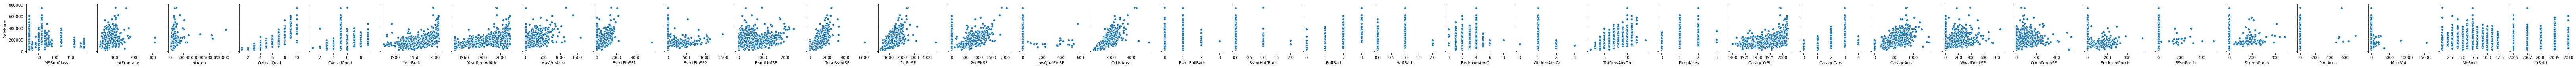

In [15]:
sns.pairplot(data=train,
             x_vars = numeric_column_names,
             y_vars = ["SalePrice"]
            );

Добре, от тези графики можем да изведем, че все пак има някои взаимовръзки, които, ако не линейно, то са достатъчно близо до линейни за да не си струва да си усложняваме модела допълнително като ги one-hot-encode -ваме.
Нека се вгледаме още по отблизо.

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\python37\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


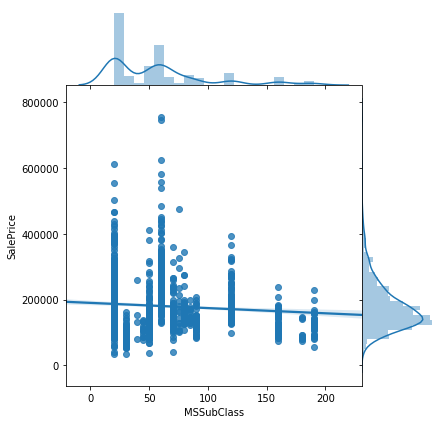

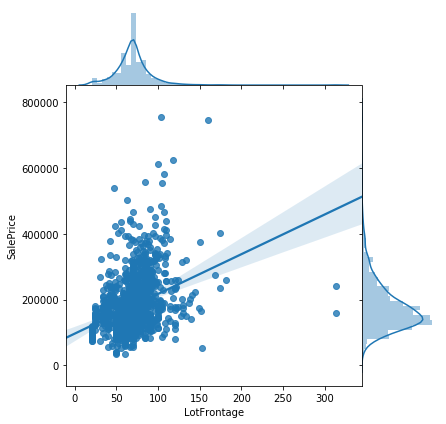

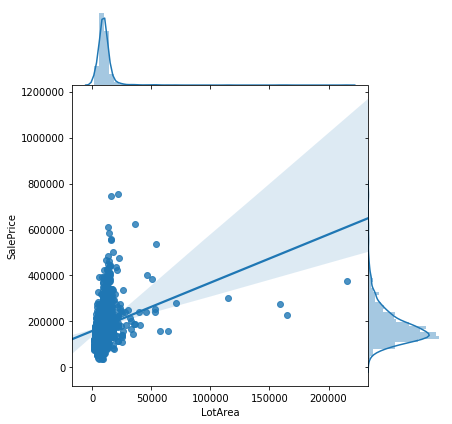

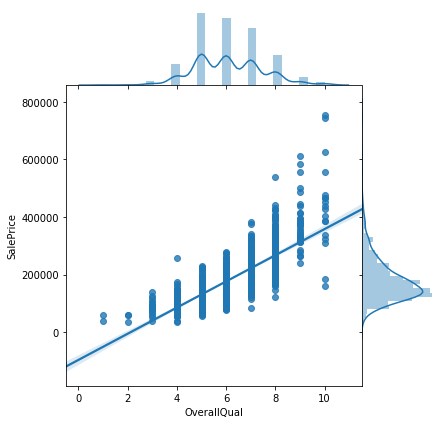

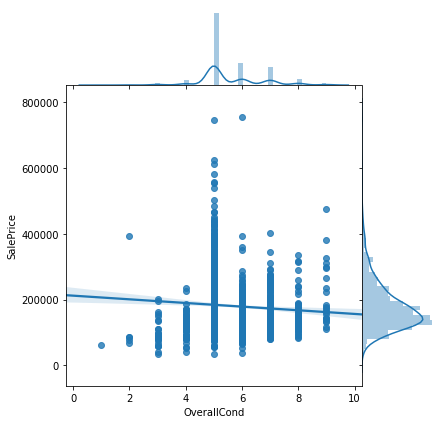

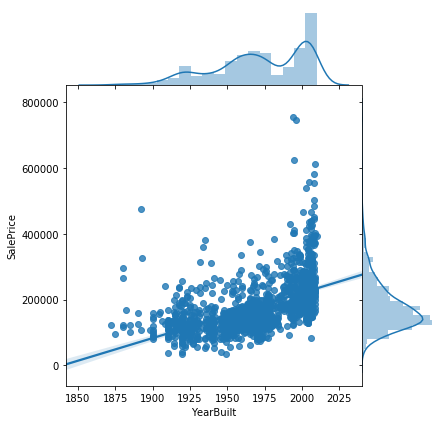

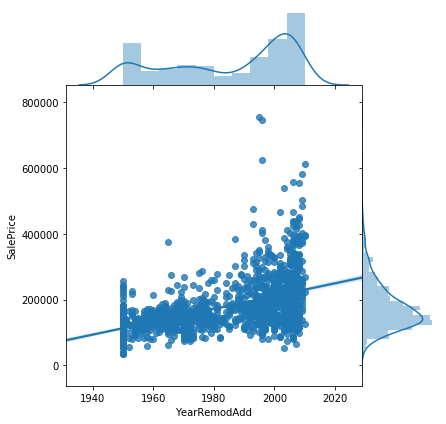

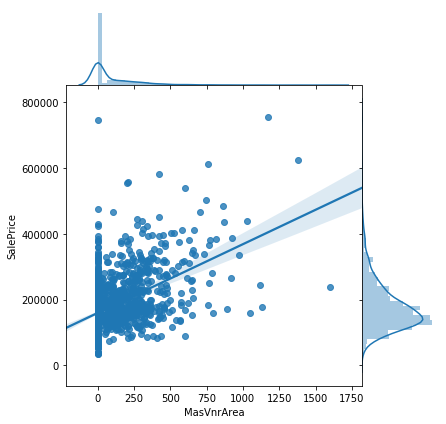

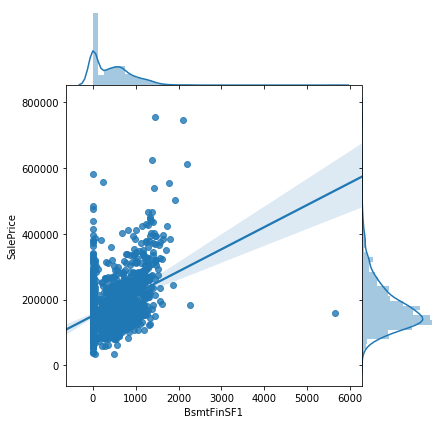

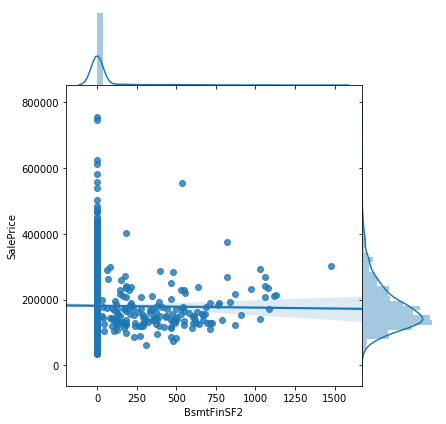

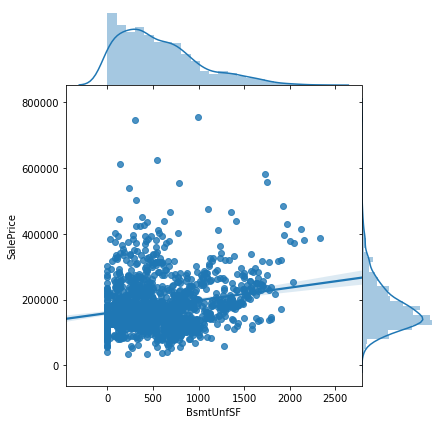

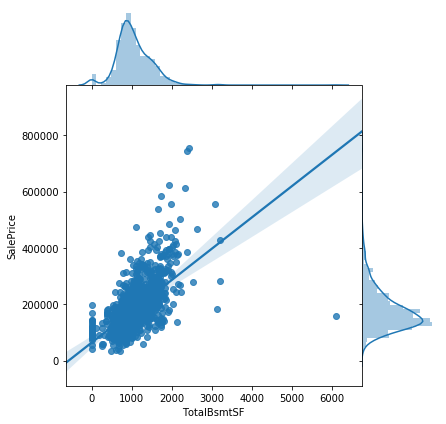

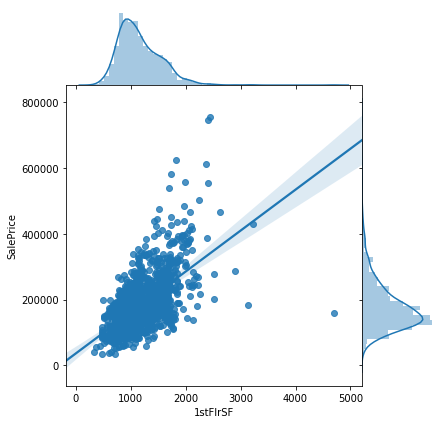

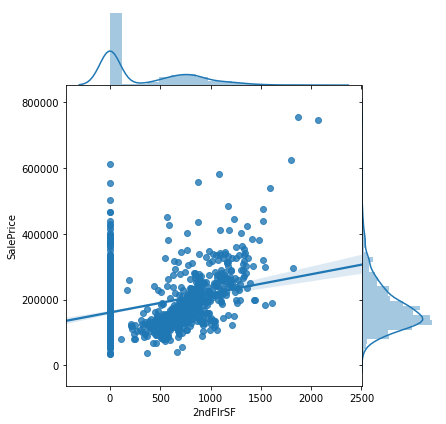

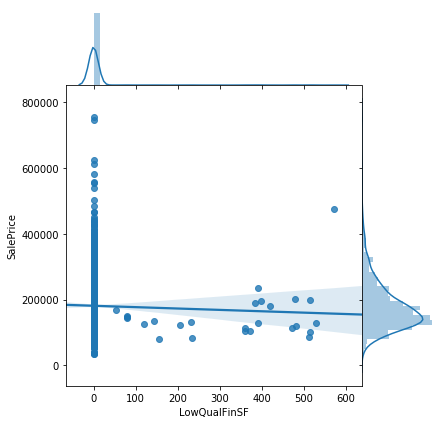

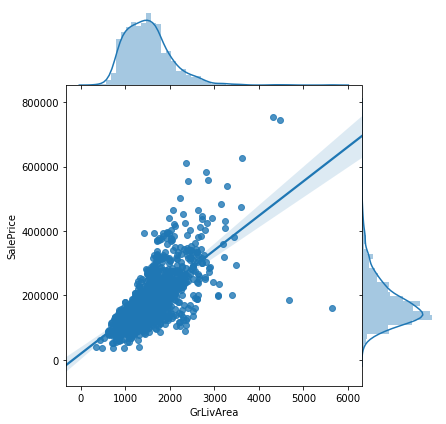

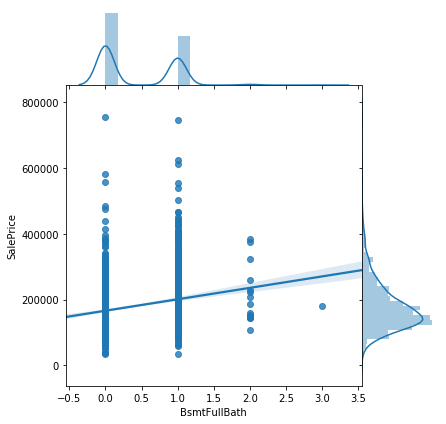

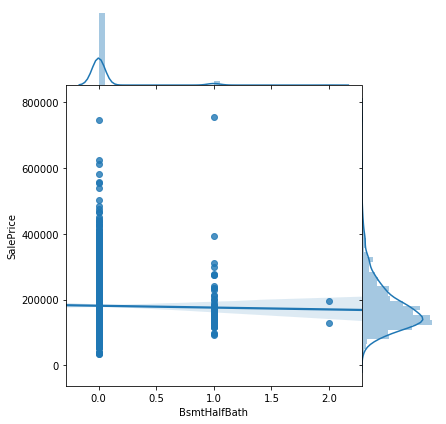

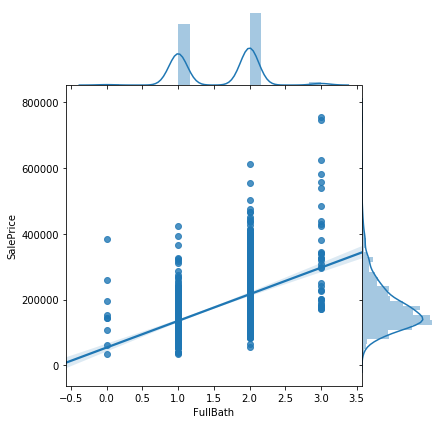

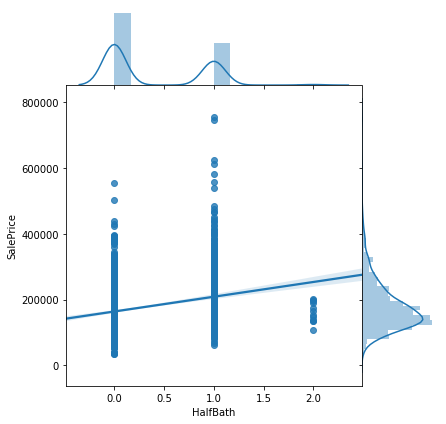

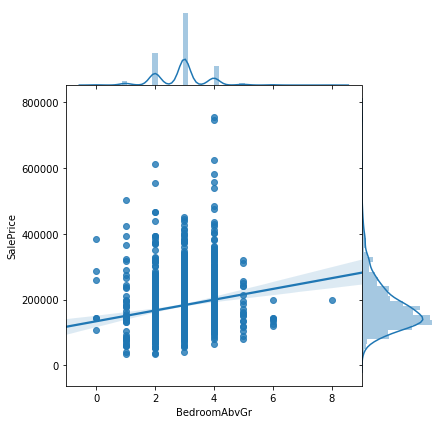

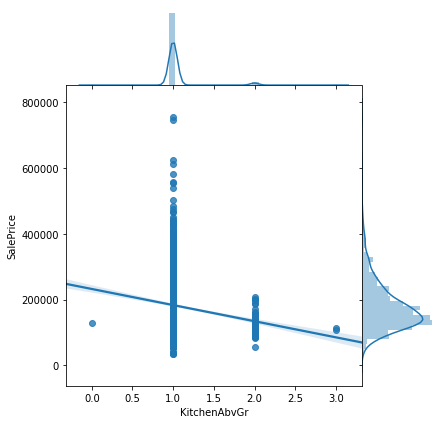

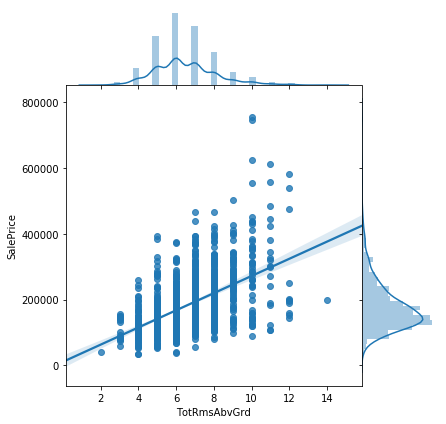

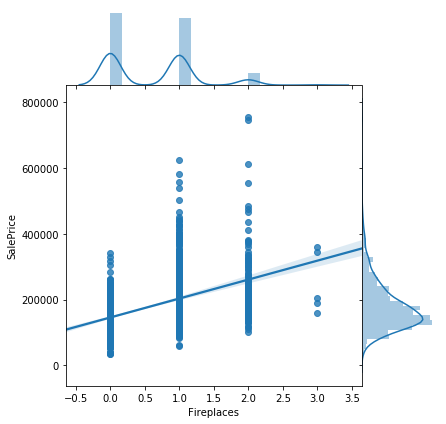

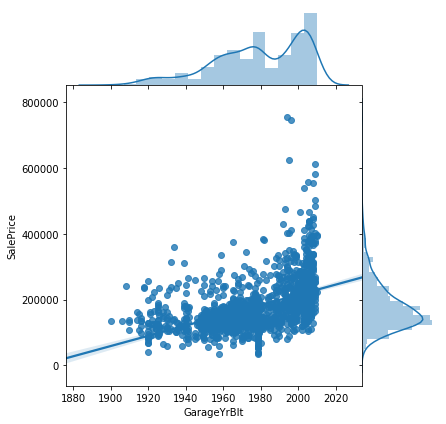

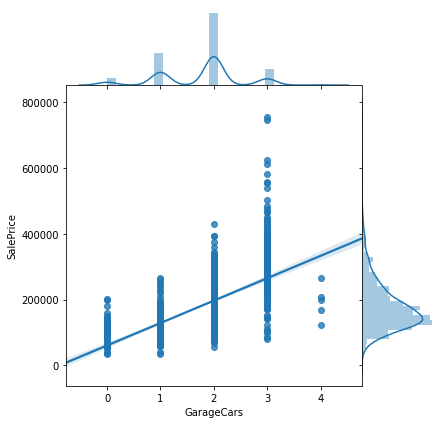

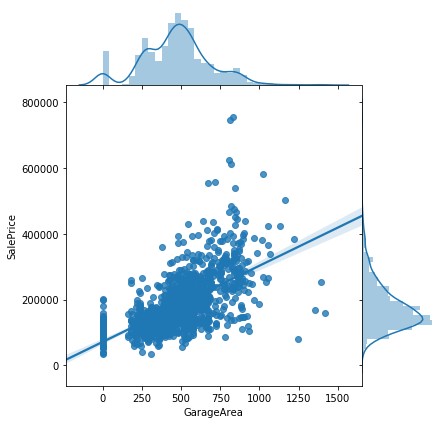

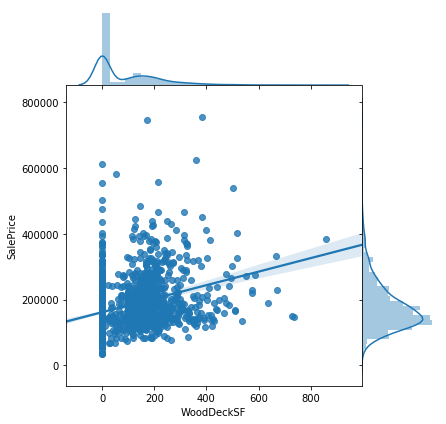

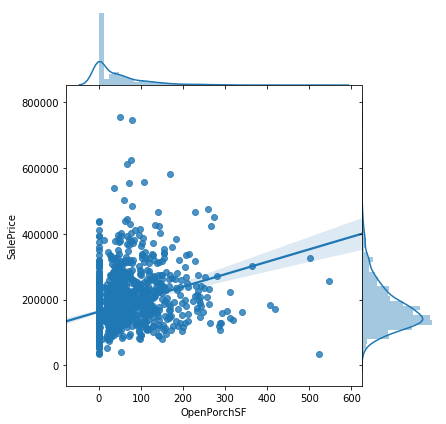

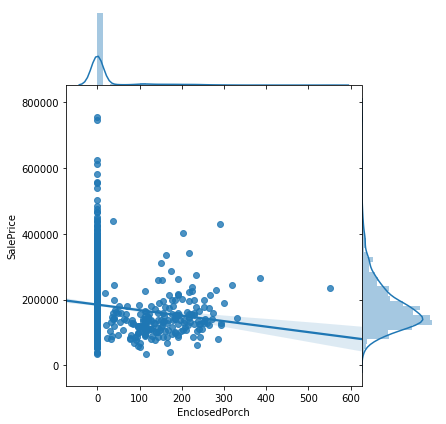

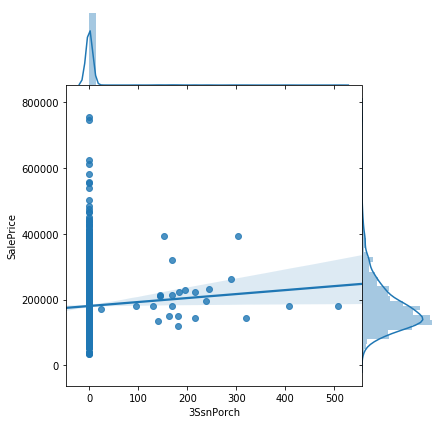

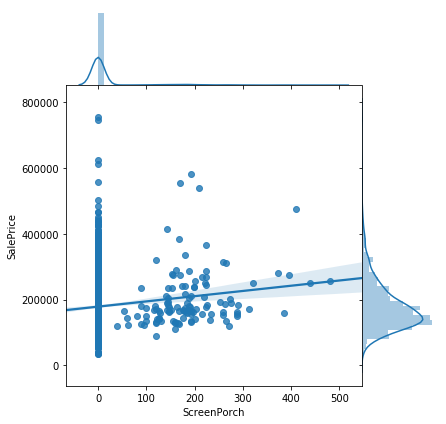

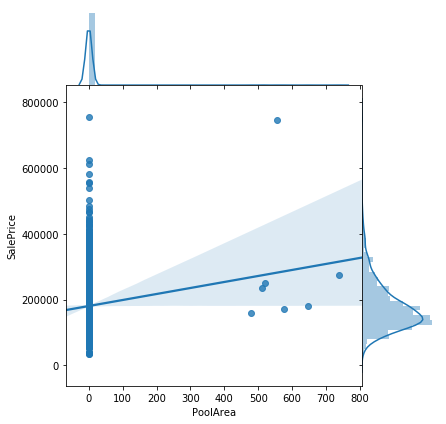

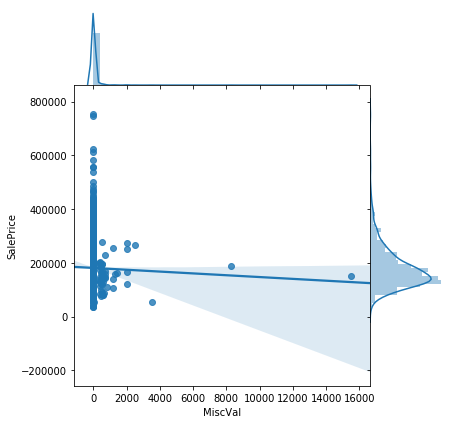

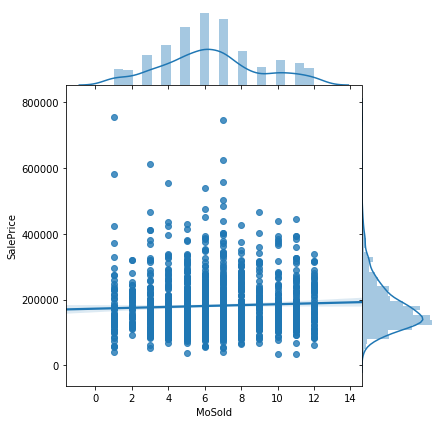

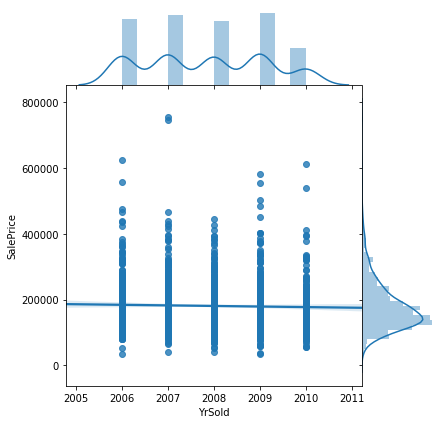

In [16]:
for index in numeric_column_names:
    sns.jointplot(data=train,
                   x=index, 
                   y='SalePrice', 
                   kind='reg', 
                   space=0, height=6, ratio=4);

След известно мислене, и рънване на опити, стигаме до следните заключения:

1) Огромната част от тези колони са окей да бъдат моделирани линейно. Категорийните ни колони са си вече overfit-ващи. => ще си върнем numeric колоните там, където принадлежат.

2) Има някои колони, които или имат много голям шум в тях, или не допринасят с почти нищо за модела. Ще премахнем тези колони, но нека преди това се вгледаме по внимателно.

Гледаме зависимостите, и drop-ваме колоните, където нещата изглеждат if-y.
(преди това сме си поиграли да изтестваме как drop-ването на по-голямата част от тези променливи би афектирало score-a

NOTE: To be fair, след доста играчка с махане на колони, стигнах до извода, че в по-голямата част от случаите (obv, не във всички), това дали като махнеш колона ще си подобриш резултата е божа работа. Сега, ако тръгнех да променям random state-a, най-вероятно модела ми ще работи по-добре, ако премахна други колони, а тези ги оставя.

In [17]:
#MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1
#BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, 
#HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF
#OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

numeric_column_names = train.describe().columns.drop(labels=["SalePrice"])

numeric_columns_to_drop = pd.Index(['LotFrontage', 'BsmtHalfBath', '3SsnPorch'
                                    ])

#'YrSold','MoSold', 'PoolArea', 'OpenPorchSF', 'LowQualFinSF',  'BsmtUnfSF'
numeric_column_names = numeric_column_names.drop(numeric_columns_to_drop)

In [18]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
print(new_x_train.shape, new_x_test.shape)

(1022, 284) (438, 284)


In [19]:
maxTest = [0,0,0]
curTest = [0,0,0]
bestSolver = ""

for solverName in ['auto','svd']:
    for i in range (1, 10):
        all_data_lr = Ridge(alpha = i/10, solver=solverName).fit(new_x_train, pd.np.log10(y_train))
        curTest[0] = all_data_lr.score(new_x_train, pd.np.log10(y_train))
        curTest[1] = all_data_lr.score(new_x_test, pd.np.log10(y_test))
        curTest[2] = i/10
        if(maxTest[1] < curTest[1]):
            maxTest = curTest[:]
            bestSolver = solverName
        
bestAlpha = maxTest[2]
        
print ("train score: ", maxTest[0])
print ("test score: ", maxTest[1])
print ("alpha: ", bestAlpha)
print ("bestSolver", bestSolver)

train score:  0.9444381941640848
test score:  0.9032426130473156
alpha:  0.2
bestSolver svd


In [20]:
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])

one_hot_encoder = OneHotEncoder().fit(train[categorical_column_names])

one_hot_x_data = one_hot_encoder.transform(train[categorical_column_names])

In [21]:
def pipeline_data(data):
    data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
    data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
    data[numeric_column_names] = data[numeric_column_names].fillna(0)
    data[categorical_column_names] = data[categorical_column_names].fillna("")
    _numeric = data[numeric_column_names]
    _one_hot_encoded = one_hot_encoder.transform(data[categorical_column_names])
    _merged = pd.np.concatenate([_one_hot_encoded.todense(), _numeric], axis=1)
    return _merged

In [22]:
full_x = pipeline_data(train)
full_y = train['SalePrice']

# Fix test set missing data problems
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)

test_set = pipeline_data(test)

По-нагоре експериментално намерихме, alpha-та и solver-a за които ridge работи най-добре с логаритмуваните данни.

Забележка: След някакво количество експериментиране с lasso, решаваме че ridge е по-добра идея за тези данни.

In [23]:
ridge = Ridge(alpha=bestAlpha, solver=bestSolver).fit(full_x, pd.np.log10(full_y))
print("score: ", ridge.score(full_x, pd.np.log10(full_y)))

predictions = 10**ridge.predict(test_set)

predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})

score:  0.9414915636964701


Нека проверим дали ще си струва да закръгляме, и докъде:

In [24]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
print(len(train[train['SalePrice']%100 == 0]))
print(len(train[train['SalePrice']%500 == 0]))
print(len(train[train['SalePrice']%1000 == 0]))

1325
1163
891


Решаваме, че най-добра идея ще бъде да закръглим до първите 3 знака.
Unfortunately, kaggle не е съгласен с нашият ред на мисли, и не успяваме да си подобрим резултата ;(
След като не успяваме и със закръгляне до първите 2 знака, решаваме да спрем да си гърмим daily опитите в Kaggle за глупости.

In [25]:
predictions_backup = predictions_df.copy()

for i in range(0, len(predictions_df)):
    pred = predictions_df['SalePrice'][i]
    if(abs(pred/1000 - math.ceil(pred/1000)) < abs(pred/1000 - math.floor(pred/1000))):
        predictions_df.loc[i, 'SalePrice'] = math.ceil(pred/1000) * 1000
    else:
        predictions_df.loc[i, 'SalePrice']  = math.floor(pred/1000) * 1000

print(predictions_df.head())

predictions_df = predictions_backup

     Id  SalePrice
0  1461   120000.0
1  1462   151000.0
2  1463   183000.0
3  1464   201000.0
4  1465   197000.0


In [26]:
predictions_df.to_csv("/Users/Kaloyan/Documents/JupyterNotebooks/submit_me.csv", index=False)
predictions_df.head()

,Id,SalePrice
0,1461,119665.080706
1,1462,151048.836006
2,1463,182584.016080
3,1464,201108.211923
4,1465,197284.157546


## Overall, позиция 1322 в Kaggle. 